# Zach Kelly

## research question/interests

The objective behind this repository is to extract meaningful information from a ufc dataset and present it in a more easily interpreted format. 

The following research questions will be investigated:
1. Fighters with most submission wins amoung all divisions.
2. Average height in each division for both the male and female competitors.
3. Count of fights won as a function of age for both the male and female competitors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/raw_data.csv")
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


# Milestone 3

### Task 1: Conduct an Exploratory Data Analysis (EDA)

In [3]:
df.info() # find which data tyoes are used in the dataset and the class it's stored in. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [4]:
df.shape # find the size of the dataframe.

(6012, 144)

In [5]:
df.describe().T # find general statistics of the dataframe

,count,mean,std,min,25%,50%,75%,max
B_avg_KD,4585.0,0.247476,0.378509,0.0,0.000000,0.015625,0.5000,5.00
B_avg_opp_KD,4585.0,0.176818,0.324633,0.0,0.000000,0.000000,0.2500,3.00
B_avg_SIG_STR_pct,4585.0,0.453310,0.130458,0.0,0.376489,0.450000,0.5275,1.00
B_avg_opp_SIG_STR_pct,4585.0,0.434290,0.132618,0.0,0.351045,0.427500,0.5100,1.00
B_avg_TD_pct,4585.0,0.292650,0.273628,0.0,0.031250,0.250000,0.5000,1.00
...,...,...,...,...,...,...,...,...
R_Height_cms,6008.0,178.991788,8.812985,152.4,172.720000,180.340000,185.4200,210.82
R_Reach_cms,5606.0,183.562347,10.585313,152.4,177.800000,182.880000,190.5000,213.36
R_Weight_lbs,6010.0,170.686356,35.724626,115.0,145.000000,170.000000,185.0000,345.00
B_age,5840.0,29.293151,4.063297,18.0,26.000000,29.000000,32.0000,51.00


Lets explore the columns relevant to our research questions and find the range of possible column entries for each.

In [6]:
display(df['Winner'].unique())
display(df['R_fighter'].unique())
display(df['B_fighter'].unique())
display(df['R_win_by_Submission'].unique())
display(df['B_win_by_Submission'].unique())
display(df['R_Height_cms'].unique())
display(df['B_Height_cms'].unique())
display(df['weight_class'].unique())
display(df['R_age'].unique())
display(df['B_age'].unique())

array(['Red', 'Blue', 'Draw'], dtype=object)

array(['Adrian Yanez', 'Trevin Giles', 'Tai Tuivasa', ...,
       'Jason DeLucia', 'Orlando Wiet', 'Scott Morris'], dtype=object)

array(['Gustavo Lopez', 'Roman Dolidze', 'Harry Hunsucker', ...,
       'David Levicki', 'Ray Wizard', 'Sean Daugherty'], dtype=object)

array([ 0,  2,  1,  5,  6,  3,  4, 10,  9, 11, 13,  7,  8, 12],
      dtype=int64)

array([ 1,  0,  2,  4,  3,  5, 14,  6, 13,  9,  7, 11,  8], dtype=int64)

array([170.18, 182.88, 187.96, 160.02, 167.64, 185.42, 177.8 , 165.1 ,
       190.5 , 175.26, 172.72, 162.56, 195.58, 193.04, 180.34, 154.94,
       157.48, 198.12, 200.66, 210.82, 152.4 ,    nan, 203.2 , 208.28])

array([165.1 , 187.96, 152.4 , 180.34, 177.8 , 190.5 , 170.18, 167.64,
       195.58, 172.72, 182.88, 160.02, 193.04, 162.56, 175.26, 185.42,
       200.66, 198.12, 154.94, 157.48, 210.82, 203.2 ,    nan, 208.28])

array(['Bantamweight', 'Middleweight', 'Heavyweight', 'WomenStrawweight',
       'WomenBantamweight', 'Lightweight', 'Welterweight', 'Flyweight',
       'LightHeavyweight', 'Featherweight', 'WomenFlyweight',
       'WomenFeatherweight', 'CatchWeight', 'OpenWeight'], dtype=object)

array([27., 28., 25., 43., 41., 31., 37., 34., 29., 33., 36., 26., 35.,
       23., 38., 32., 30., 42., 22., 40., 24., 21., 39., 20., 44., 19.,
       45., nan, 47., 46.])

array([31., 32., 28., 29., 27., 35., 24., 30., 33., 34., 26., 25., 23.,
       36., 39., 40., 37., 41., 21., 45., 38., 22., 43., 44., 20., 42.,
       19., 46., nan, 47., 18., 51.])

The above output describes all possible values in each column and the datatype if only one exists. For instance, the Winner column has possible values Red, Blue, or Draw and is type object. The output also tell us we have missing data (nan values) in some of our columns, which is an indicator we may want to drop the corresponding rows from the dataset.   

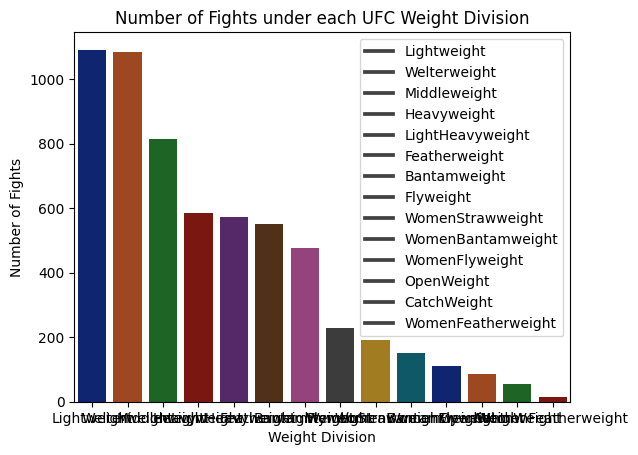

In [7]:
# barplot of the number of fights in each weight division
x = (df['weight_class'].value_counts())

div_fight = pd.DataFrame(x)
div_fight['division'] = div_fight.index
div_fight = div_fight.rename(columns={'weight_class':'num_fights'})
ax = sns.barplot(data=div_fight, x ='division', y='num_fights',palette='dark')

ax.set (
    title = 'Number of Fights under each UFC Weight Division',
    xlabel = 'Weight Division',
    ylabel = 'Number of Fights'
)

plt.legend(list(div_fight['division']))

The above figure describes the distrubition of fight data for each weight divisions. The data set contains the most number of fights for the lightweight and welterweight divisions, and does not contain many fights for the female divisions. 

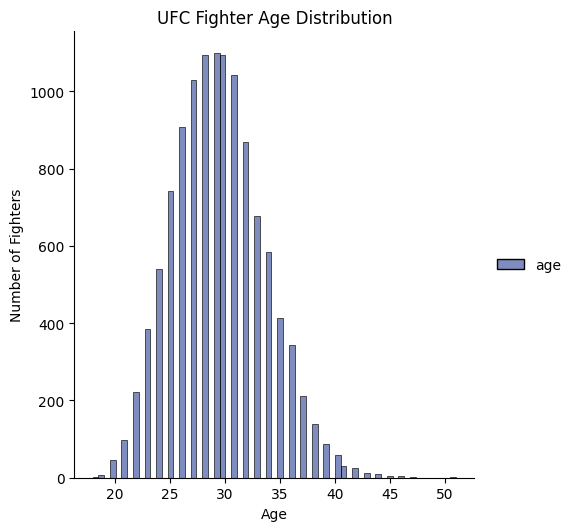

In [8]:
# displot of fighter age
age2 = df['B_age']
age1 = df['R_age']

age = pd.concat([age1,age2],axis=0).dropna().reset_index().drop(columns = 'index').rename(columns = {0:'age'})
ax = sns.displot(data = age, palette='dark')

ax.set (
    title = 'UFC Fighter Age Distribution',
    xlabel = 'Age',
    ylabel = 'Number of Fighters'
)

The above figure describes the distribution of age amoung the UFC data set. Based on observation, the most common UFC fighter age is approximately 29 years old.

[Text(0.5, 1.0, 'UFC Fighter Height Distribution'),
 Text(0, 0.5, 'Number of Fighters')]

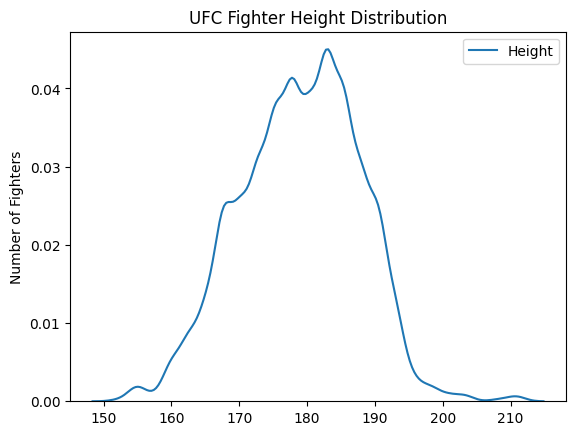

In [9]:
# displot of fighter height
height1 = df['R_Height_cms']
height2 = df['B_Height_cms']

height = pd.concat([height1,height2],axis=0).dropna().reset_index().drop(columns = 'index').rename(columns = {0:'Height'})
ax = sns.kdeplot(data = height)

ax.set (
    title = 'UFC Fighter Height Distribution',
    ylabel = 'Number of Fighters'
)

The figure above describes the probability of height amoung the UFC data set. Based on observation, the most probable UFC fighter height is approximately 183 centimeters.

### Task 2: Data Analysis Pipeline
1. Load Data
2. Clean Data
3. Process Data

In [57]:
# import the raw data set (comma delimeted file)
df = pd.read_csv("../data/raw/raw_data.csv")

# create dataframe using only the relevant columns to the research questions from the raw data set 'df'.
df_clean = pd.concat(
    [df['Winner'],df['R_fighter'],df['B_fighter'],df['weight_class'],df['R_age'],df['B_age'],df['R_Height_cms'],df['B_Height_cms'],df['R_win_by_Submission'],df['B_win_by_Submission']],
    axis = 1
)

# remove all rows containing NaN values, create new index column and remove the old, then rename column keys to desired format
df_clean = df_clean.dropna().rename(columns={
    'Winner':'winner',
    'R_fighter':'r_fighter','B_fighter':'b_fighter',
    'R_age':'r_age','B_age':'b_age',
    'R_Height_cms':'r_height_in','B_Height_cms':'b_height_in',
    'R_win_by_Submission':'r_submission_w','B_win_by_Submission':'b_submission_w'
    })
df_clean = df_clean.drop(df_clean[df_clean['winner']=='Draw'].index).reset_index().drop(columns='index')

df_processed = df_clean.copy()

# convert values in height columns from centimeters to inches
df_processed['r_height_in'] = [df_processed['r_height_in'][i]*(0.393701) for i in range(len(df_processed['r_height_in']))]
df_processed['b_height_in'] = [df_processed['b_height_in'][i]*(0.393701) for i in range(len(df_processed['r_height_in']))]

# convert winner column from object to type integer
#df_processed['winner'] = [(df_processed['winner'].replace({'Red':1}) if df_processed['winner'][i] == 'Red' else df_processed['winner'][i] != 0) for i in range(len(df_processed['winner']))]

df_processed.head(10)

,winner,r_fighter,b_fighter,weight_class,r_age,b_age,r_height_in,b_height_in,r_submission_w,b_submission_w
0,Red,Adrian Yanez,Gustavo Lopez,Bantamweight,27.0,31.0,67.000036,65.000035,0,1
1,Red,Trevin Giles,Roman Dolidze,Middleweight,28.0,32.0,72.000039,74.000040,0,0
2,Red,Tai Tuivasa,Harry Hunsucker,Heavyweight,28.0,32.0,74.000040,74.000040,0,0
3,Blue,Cheyanne Buys,Montserrat Conejo,WomenStrawweight,25.0,28.0,63.000034,60.000032,0,0
4,Blue,Marion Reneau,Macy Chiasson,WomenBantamweight,43.0,29.0,66.000036,71.000038,2,1
5,Blue,Leonardo Santos,Grant Dawson,Lightweight,41.0,27.0,72.000039,70.000038,2,2
6,Blue,Song Kenan,Max Griffin,Welterweight,31.0,35.0,72.000039,71.000038,0,0
7,Red,Derek Brunson,Kevin Holland,Middleweight,37.0,28.0,73.000039,75.000041,1,2
8,Red,Montel Jackson,Jesse Strader,Bantamweight,28.0,29.0,70.000038,67.000036,1,0
9,Red,Bruno Silva,JP Buys,Flyweight,31.0,24.0,72.000039,65.000035,0,0


### Task 3: Method Chaining

In [ ]:
# make function in seperate .py file that conducts an analysis pipeline via method chaining

### Task 4: Data Analysis 